<a href="https://colab.research.google.com/github/logeshwari-05/task1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


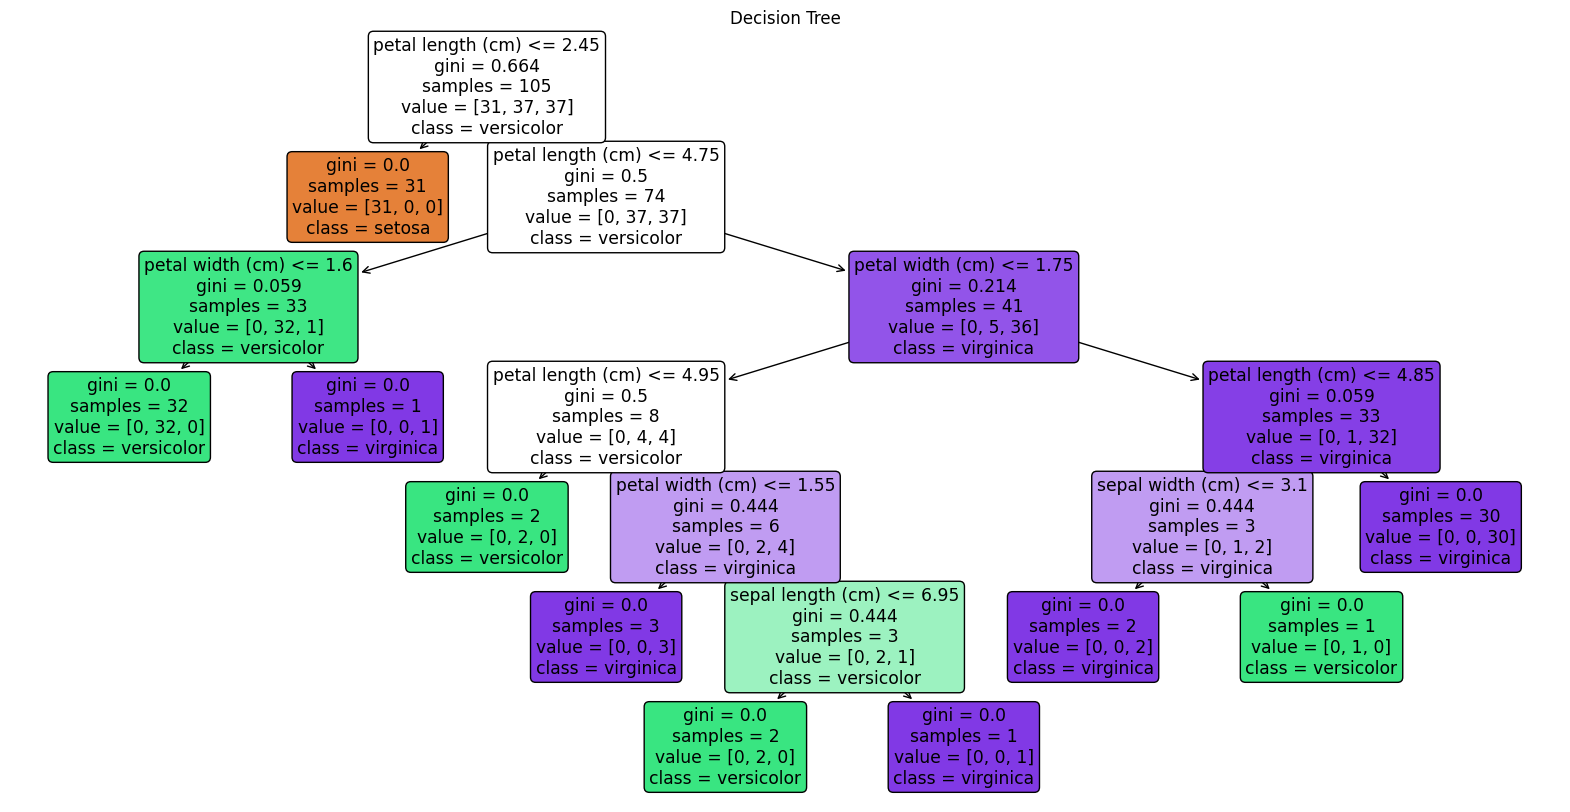

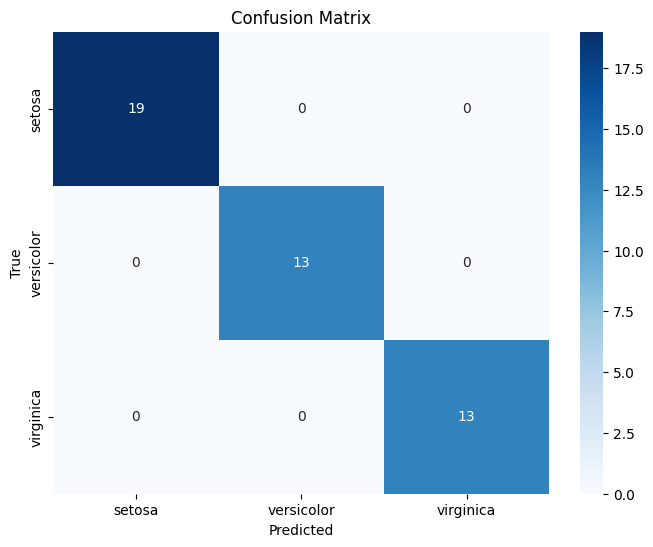

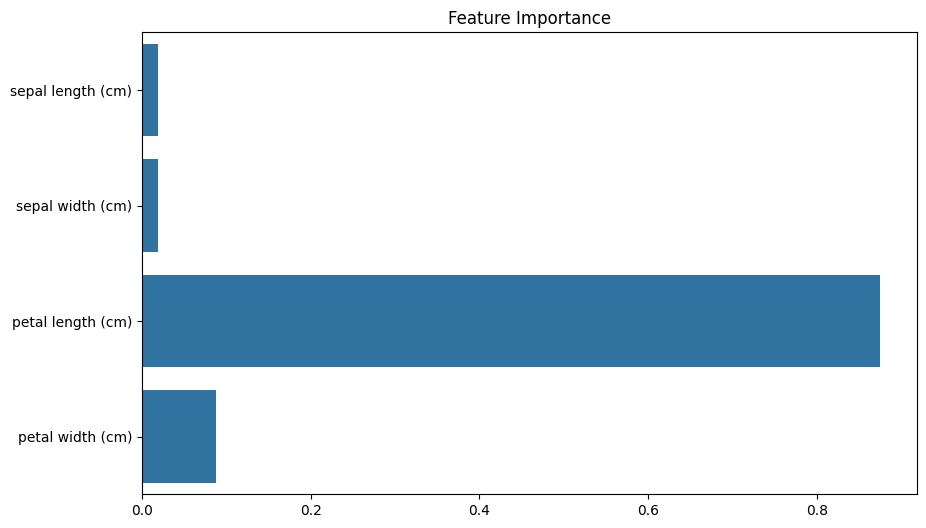

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [2]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree")
plt.show()

# Plot the Confusion Matrix
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Plot Feature Importance
feature_importance = clf.feature_importances_
features = iris.feature_names
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.show()

# Pairplot of the features
sns.pairplot(pd.DataFrame(X, columns=iris.feature_names), hue=pd.Series(y, name='Species'), palette="husl", markers=["o", "s", "D"])
# Histograms of each feature
for idx, feature in enumerate(iris.feature_names):
    plt.figure(figsize=(6,4))
    sns.histplot(X[:, idx], kde=True, hue=pd.Series(y, name='Species'), palette="husl")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(iris.target_names)
    plt.show()
